In [43]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [44]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


In [23]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [25]:
data.drop(data.loc[data['RestingBP']==0].index, inplace=True)
data.drop(data.loc[data['Cholesterol']==0].index, inplace=True)
data.reset_index(drop=True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    object 
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 70.1+ KB


In [26]:
np.random.seed(50)

In [27]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_F              746 non-null    float64
 1   Sex_M              746 non-null    float64
 2   ChestPainType_ASY  746 non-null    float64
 3   ChestPainType_ATA  746 non-null    float64
 4   ChestPainType_NAP  746 non-null    float64
 5   ChestPainType_TA   746 non-null    float64
 6   FastingBS_0        746 non-null    float64
 7   FastingBS_1        746 non-null    float64
 8   RestingECG_LVH     746 non-null    float64
 9   RestingECG_Normal  746 non-null    float64
 10  RestingECG_ST      746 non-null    float64
 11  ExerciseAngina_N   746 non-null    float64
 12  ExerciseAngina_Y   746 non-null    float64
 13  ST_Slope_Down      746 non-null    float64
 14  ST_Slope_Flat      746 non-null    float64
 15  ST_Slope_Up        746 non-null    float64
dtypes: float64(16)
memory usag

In [28]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
data_res = data['HeartDisease']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

In [29]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

In [30]:
y = pd.DataFrame(data_ohe['HeartDisease'])
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=50)

### Neural Network
A neural network consists of multiple layers of nodes — an input layer, one or more hidden layers, and an output layer. It makes decisions in a manner similar to the human brain, by using processes that mimic the way biological neurons work together to identify phenomena, weigh options and arrive at conclusions.

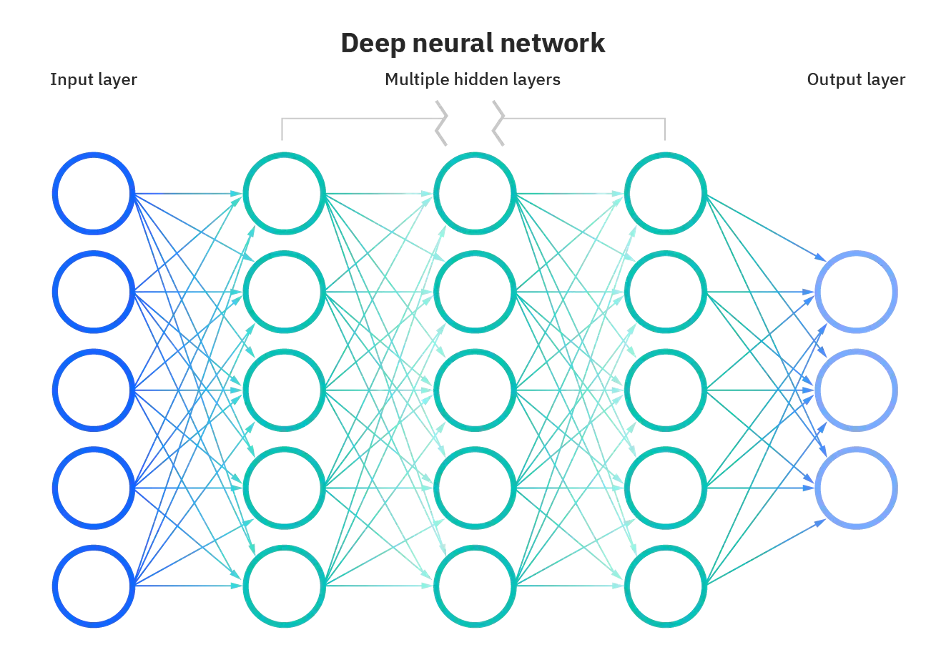

In [46]:
from IPython.display import Image
Image("neural-network.png")

### MLPClassifier

We will now implement a neural network using the MLPClassifier from sklearn. There are many parameters we can fine-tune, but we will only be focusing on `hidden_layer_sizes`, `alpha`, `learning_rate_init` and `max_iter`.

Training Accuracy     : 0.9980842911877394
Model Accuracy Score  : 0.8035714285714286
Model F1 Score  : 0.7864077669902914
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       124
           1       0.76      0.81      0.79       100

    accuracy                           0.80       224
   macro avg       0.80      0.80      0.80       224
weighted avg       0.81      0.80      0.80       224



<Axes: >

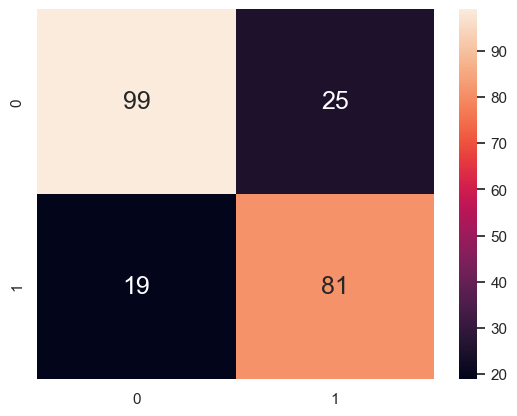

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter = 1000,alpha=0.0001,learning_rate_init=0.001)
mlp.fit(X_train,y_train.HeartDisease.ravel())
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = mlp.score(X_train, y_train)
mlp_accuracy = accuracy_score(y_test, y_pred_MLP)
mlp_f1 = f1_score(y_test, y_pred_MLP)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)
print("Model F1 Score  :",mlp_f1)
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

sb.heatmap(confusion_matrix(y_test,y_pred_MLP), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Now, let us use GridSearchCV() to help us refine our parameters.

In [32]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100), (200,200,200), (200,200,200,200,200), (200,200,200,200,200,200,200), (300,300,300), (300,300,300,300,300), (300,300,300,300,300,300,300)],
              'alpha': [0.0001, 0.001, 0.01, 0.1],                            
              'learning_rate_init': [0.001, 0.01, 0.1],                        
              'max_iter': [10000]}          

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(MLPClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HeartDisease.ravel())

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100,
                                                 100),
                                                (200, 200, 200),
                                                (200, 200, 200, 200, 200),
                                                (200, 200, 200, 200, 200, 200,
                                                 200),
                                                (300, 300, 300),
                                                (300, 300, 300, 300, 300),
                                                (300, 300, 300, 300, 300, 300,
                                                 300)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [1000, 2000, 3000]},
             scoring='accuracy')

In [33]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100),
              learning_rate_init=0.01, max_iter=2000)
0.8544139194139195


### Trade-offs in refining the neural network
The GridSearchCV() can be improved by expanding the number of parameters and possible values it explores. However, the current implementation of GridSearchCV() already requires a substantial amount of time to execute. Exploring more parameters and possible values would result in a better model, but at the expense of requiring more time and incurring higher computational cost.

Tuning the values of the parameters for the neural network, such as increasing the number of hidden layers and the number of nodes in each layer, could potentially result in a better model but also comes at the expense of requiring more time and  incurring higher computational cost.

### Using the Best Model found through GridSearchCV

Training Accuracy     : 0.9961685823754789
Model Accuracy Score  : 0.8348214285714286
Model F1 Score  : 0.8195121951219512
Classification_Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       124
           1       0.80      0.84      0.82       100

    accuracy                           0.83       224
   macro avg       0.83      0.84      0.83       224
weighted avg       0.84      0.83      0.84       224



<Axes: >

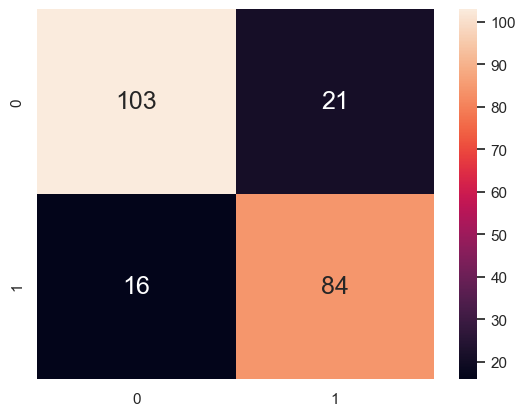

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100),max_iter = 2000,alpha=0.1,learning_rate_init=0.01)
mlp.fit(X_train,y_train.HeartDisease.ravel())
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = mlp.score(X_train, y_train)
mlp_accuracy = accuracy_score(y_test, y_pred_MLP)
mlp_f1 = f1_score(y_test, y_pred_MLP)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)
print("Model F1 Score  :",mlp_f1)
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

sb.heatmap(confusion_matrix(y_test,y_pred_MLP), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Keras Sequential Model

Now, let us try another implementation of a neural network, to see if we are able to achieve a better accuracy and F1 score.

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initializing the NN
nn = Sequential()

# Adding the Input layer and the First Hidden Layer
nn.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu',input_dim=X_train.shape[1]))

# Adding the Second Hidden Layer
nn.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='relu'))

# Adding the output layer
nn.add(Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the NN
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the NN to the Training set
nn.fit(X_train,y_train.HeartDisease.ravel(),validation_split=0.33,batch_size=10,epochs = 100)

Epoch 1/100


C:\Users\gohsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4773 - loss: 1.0988 - val_accuracy: 0.4913 - val_loss: 0.8266
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 0.8602 - val_accuracy: 0.5087 - val_loss: 0.7414
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5480 - loss: 0.7387 - val_accuracy: 0.5029 - val_loss: 0.6820
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 0.6827 - val_accuracy: 0.5202 - val_loss: 0.6392
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 0.6530 - val_accuracy: 0.5896 - val_loss: 0.6080
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.5837 - val_accuracy: 0.6532 - val_loss: 0.5806
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - loss: 0.5801 - val_accuracy: 0.7052 - val_loss: 0.5614
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6859 - loss: 0.6077 - val_accuracy: 0.7399 - val_loss: 0.5

In [36]:
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6)                   │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model Accuracy Score  : 0.8571428571428571
Model F1 Score  : 0.8490566037735849
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       124
           1       0.80      0.90      0.85       100

    accuracy                           0.86       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.86      0.86      0.86       224



<Axes: >

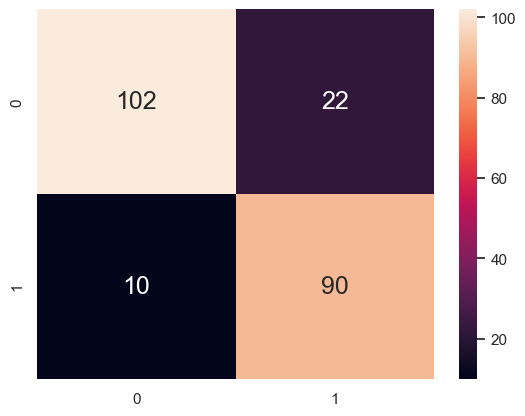

In [52]:
y_pred_nn = nn.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

nn_accuracy = accuracy_score(y_test,y_pred_nn)
nn_f1 = f1_score(y_test,y_pred_nn)

print("Model Accuracy Score  :",nn_accuracy)
print("Model F1 Score  :",nn_f1)
print("Classification_Report: \n",classification_report(y_test,y_pred_nn))

sb.heatmap(confusion_matrix(y_test,y_pred_nn), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Conclusion

| Test Data |   MLPClassifier    |    Keras Sequential Model    |
| :---              | :---: | :----: |
| Accuracy  |   0.8348214285714286    |    0.8571428571428571    |
| F1 Score  |   0.8195121951219512    |    0.8490566037735849    |

The Keras Sequential Model manages to achieve the higher accuracy of `0.8571428571428571` and higher F1 score of `0.8490566037735849`.